In [44]:
# based on code from
# https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01

import pandas as pd # pandas is used for loading, transforming and analyzing data
import os # provides a way of using operating system dependent functionality
from skimage.transform import resize # used to resize an image of array of images
from skimage.io import imread # imread reads images stored on disk and converts them into a numpy array
import numpy as np # provides mathematical functions and data structures
import matplotlib.pyplot as plt # creates visualisations
from sklearn import svm # import svm model from sci-kit learn
from sklearn.model_selection import GridSearchCV # GridSearchCV is used to find the best hyperparameters
from sklearn.model_selection import train_test_split # splits dataset into two parts - training and testing 
from sklearn.metrics import accuracy_score # calculates the accuracy of the predicted labels against the true labels

In [45]:
Categories = ['Caterpillar', 'Diabrotica speciosa', 'Healthy']
flat_data_arr=[] # input array
target_arr=[] # output array

In [46]:
datadir = 'C:\\Users\\User\\Documents\\Python Scripts\\SDGP\\Soybean Dataset' 

In [47]:
for i in Categories:
    print(f'loading... category : {i}')    
    path=os.path.join(datadir,i)    
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())        
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : Caterpillar
loaded category:Caterpillar successfully
loading... category : Diabrotica speciosa
loaded category:Diabrotica speciosa successfully
loading... category : Healthy
loaded category:Healthy successfully


In [48]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [49]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [51]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 1 ... 1 1 0]
The actual data is:
[0 0 0 ... 1 1 0]
The model is 70.6020328381548% accurate


In [58]:
import joblib
joblib.dump(model, 'soybean_model.joblib')

['soybean_model.joblib']

In [42]:
model = joblib.load('soybean_model.joblib')

Enter URL of Image :file:///C:/Users/User/Documents/Python%20Scripts/SDGP/Soybean%20Dataset/Diabrotica%20speciosa/diabroticaspeciosa%20(2).jpg


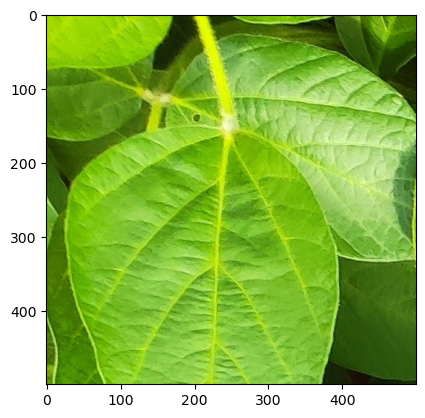

Caterpillar = 40.54026811060955%
Diabrotica speciosa = 43.87365849798492%
Healthy = 15.586073391405488%
The predicted image is : Diabrotica speciosa


In [60]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])